<a href="https://colab.research.google.com/github/GuiNakamuraC/Python/blob/main/2_Exemplo_Analise_das_Inscricoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados Simples - Inscrições do Curso

### Após a Aula introdutória vamos ver como colher algumas informações Simples Usando Python

In [ ]:
import pandas as pd #Biblioteca responsável para fazer a leitura e impressão de bases de dados

### Veja neste link como armazenar uma planilha excel no Github para usar como base de dados no COLAB

In [ ]:
url = 'https://github.com/profcintiapinho/laboratorio_ia/blob/main/respostasalunos.xlsx?raw=true' #pega o caminho do arquivo excel no github
planilha = "respostas" #identifica a planilha que está os dados
base = pd.read_excel(url,planilha) #pega o caminho e a planilha exata e armazena na variável

In [ ]:
base

,Turma,interesse,computador,motivacao
0,Novo Tec - Administração(Tarde),Noite,Sim,Quero estar mais liga e aprender muito mais s...
1,Contabilidade - Noite,Tarde,Sim,conseguir automatizar alguns processos no meu ...
2,Contabilidade - Noite,Tarde,Sim,"Obter um pouco de conhecimento nessa área, a q..."
3,Novo Tec - Recursos Humanos (Manhã),Noite,Sim,Porque o python é uma linguagens de programaçã...
4,Contabilidade - Noite,Tarde,Sim,quero aprimorar meus conhecimentos
...,...,...,...,...
56,Logistica - Noite,Tarde,não,Ter um curso extracurricular pra melhorar meu ...
57,Logistica - Noite,Tarde,não,Ter um curso extracurricular pra melhorar meu ...
58,Novo Tec - Informática (Manhã),Tarde,Sim,Busca por conhecimentos que possam agregar na ...
59,Novo Tec - Informática (Manhã),Noite,Sim,Ampliar meus conhecimentos na área de informática


In [ ]:
import matplotlib.pyplot as plt #biblioteca para gerar gráficos
import seaborn as sns #biblioteca para visualizar gráficos

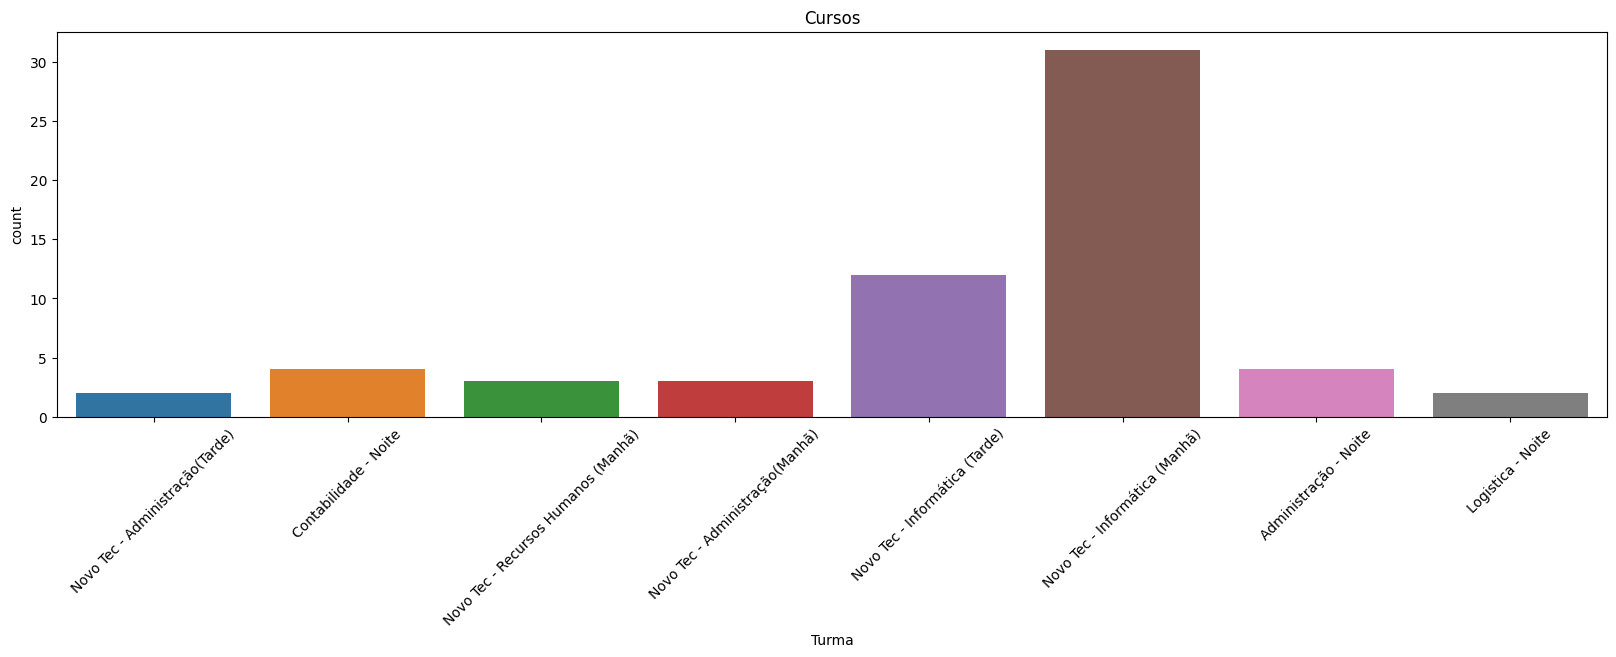

In [ ]:
plt.subplots(figsize=(20, 5))
plt.xticks(rotation=45)
plt.title('Cursos')
sns.countplot(x=base.Turma);

Text(0.5, 1.0, 'Alunos possuem computadores?')

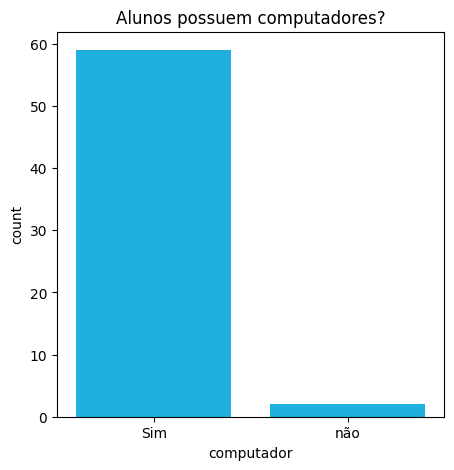

In [ ]:
plt.subplots(figsize=(5, 5))
sns.countplot(x=base['computador'], color='#00BFFF');
plt.title('Alunos possuem computadores?')

In [ ]:
base['interesse'].value_counts()

Tarde    31
Noite    30
Name: interesse, dtype: int64

In [ ]:
tarde = base.interesse.value_counts()['Tarde']
noite = base.interesse.value_counts()['Noite']
manhã = 10
madrugada = 5

In [ ]:
x = ["Tarde", "Noite", "Manhã", "Madrugada"]
y = [tarde, noite, manhã, madrugada]

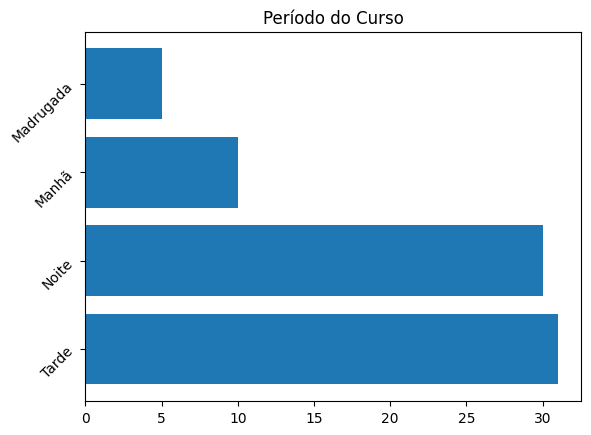

In [ ]:
plt.barh(x, y)
plt.yticks(rotation=45)
plt.title('Período do Curso')
plt.show()

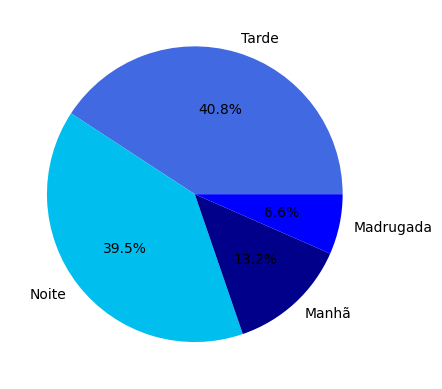

In [ ]:
cores = ['#4169E1','#00BFEF','#00008B', '#0000FF']
plt.pie(y, labels=x, autopct='%1.1f%%', colors = cores)
plt.show()

In [ ]:
import spacy
import re

In [ ]:
!python -m spacy download pt_core_news_sm

2023-09-01 10:55:21.845644: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 58.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [ ]:
pln = spacy.load('pt_core_news_sm')

In [ ]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

##STOP WORDS

São palavras que não saõ muito importantes e principais de uma frase como preposições, ligamentos, etc.

In [ ]:
#len se usa para ler quantas palavras estão contidas em algum lugar, no caso aqui os stop_words
len(stop_words)

416

In [ ]:
"possui" in stop_words

False

In [ ]:
pln.Defaults.stop_words.add("possui")

In [ ]:
import string
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def preprocessamento(text):
    result = []
    pos_tag = ['ADJ', 'NOUN', 'VERB', 'PROPN'] # escolhendo apenas adjetivos, substantivos e verbos , 'VERB'
    texto = re.sub(u'[^a-zA-Z0-9áéíóúÁÉÍÓÚâêîôÂÊÎÔãõÃÕçÇ: ]', '', text )
    doc = pln(texto.lower()) # Transformando em minúsculo
    for token in doc:
        # 3
        if(token.text in stop_words or token.text in pontuacoes):
            continue
        # 4
        if(token.pos_ in pos_tag):
            result.append(token.text)

        texto = ' '.join([str(elemento) for elemento in result if not elemento.isdigit()])


    #return result # 5
    return texto # 5

In [ ]:
base.motivacao=base.motivacao.astype(str)
base['limpa'] = base['motivacao'].apply(preprocessamento)

In [ ]:
base

,Turma,interesse,computador,motivacao,limpa
0,Novo Tec - Administração(Tarde),Noite,Sim,Quero estar mais liga e aprender muito mais s...,liga aprender tecnologia
1,Contabilidade - Noite,Tarde,Sim,conseguir automatizar alguns processos no meu ...,conseguir automatizar processos trabalho
2,Contabilidade - Noite,Tarde,Sim,"Obter um pouco de conhecimento nessa área, a q...",obter conhecimento solicitado mercado trabalho
3,Novo Tec - Recursos Humanos (Manhã),Noite,Sim,Porque o python é uma linguagens de programaçã...,python linguagens programação fácil executar p...
4,Contabilidade - Noite,Tarde,Sim,quero aprimorar meus conhecimentos,aprimorar conhecimentos
...,...,...,...,...,...
56,Logistica - Noite,Tarde,não,Ter um curso extracurricular pra melhorar meu ...,curso extracurricular melhorar currículo
57,Logistica - Noite,Tarde,não,Ter um curso extracurricular pra melhorar meu ...,curso extracurricular melhorar currículo
58,Novo Tec - Informática (Manhã),Tarde,Sim,Busca por conhecimentos que possam agregar na ...,busca conhecimentos possam agregar vida
59,Novo Tec - Informática (Manhã),Noite,Sim,Ampliar meus conhecimentos na área de informática,ampliar conhecimentos informática


In [ ]:
motivo = base['limpa'].values
juntandotudo = ''
for sentimento in motivo:
  juntandotudo += sentimento+" "

In [ ]:
juntandotudo

'liga aprender tecnologia conseguir automatizar processos trabalho obter conhecimento solicitado mercado trabalho python linguagens programação fácil executar projetos tamanhos sabendo python aprimorar conhecimentos aprimorar conhecimentos venho interessando tecnologia conhecimento adquirir conhecimentos agregar conhecimentos currículo achei interessante curso melhorar conhecimento python interessei gosto programação estudei python conhecimento indicação documentário coded bias desenvolvi interesse expandir conhecimentos futuro melhor incrementar currículo interesse interesse explorar áreas informática estudei python motivos conhecer mexe funciona adquirir conhecimento busco melhor capacitação ingressar mercado trabalho interesse tema curso gosto aprender coisas acredito oportunidade aparece agarrada tema curso desperta interesse experiência area interesse aprender tecnologias atuais ampliar conhecimento amo áreae decidindo aprender fundamental aprender coisas tornar profissional quali

In [ ]:
filme = '''Son Ye-jin em seus primeiros minutos em cena já dita o tom de como será todo o resto dessa história incrível. Ela consegue misturar humor e drama na mesma cena de maneira tão intensa, que é impossível não se apaixonar pela riquinha mimada. É claro, que a trama cresce em suspense quanto Lee Jung-Hyeok (Hyun Bin) entra em cena.
Além disso, Pousando no Amor lida com as muitas camadas e complicações que surgem de uma sul-coreana estar escondida na Coreia do Norte. Surpreendentemente, as melhores partes para mim desse KDrama foram na Coreia do Norte. Ainda assim, a atuação do elenco foi sólida e vende uma história emocionante, que destaca as disparidades entre os dois países. O verdadeiro grande pano de fundo de toda a narrativa.
Embora Pousando Para o Amor seja principalmente uma comédia romântica, não se deixe enganar, há muita ação – cenas de luta, perseguições de carro, tiroteios, tortura e muitos outros momentos emocionante. Neste KDrama, todos no elenco de personagens têm muito a perder e todos estão dispostos a fazer o que for preciso para conseguir o que desejam.
E essa tensão não vem apenas da família ou do drama político, também vem dos romances muito complicados da narrativa.
As cenas que se passam na Coreia do Norte evidenciam o militarismo e a desigualdade, enquanto as cenas que se passam na Coreia do Sul mostram o auge do desenvolvimento.
Pousando no Amor teve diversos núcleos interessantes e importantes para que a narrativa continuasse coesa, mas apesar disso, existiu diversas barrigas do meio até o final.
Também não gostei do final dado para os personagens: Seung-jun e Dan, achei desnecessário e cruel o que houve, poderia ter um outro desfecho porque apesar do histórico dos dois e do passado com os protagonistas, eles não sabotam em nenhum momento a história de Seri e Jeong-hyeok. Na verdade, eles acabam virando o principal apoio dos dois. Isso é muito raro em K-dramas, e eu realmente torci para que Dan e Alberto tivessem um final legal, coisa que infelizmente não aconteceu.
Felizmente, a maioria do elenco e produção de Pousando no Amor vende essa história muito emocionante. Achei Son Ye Jin como Seri e Seo Ji-hye como Dan completamente incríveis. Mulheres opostas, mas que no fundo lutam por seu espaço numa sociedade totalmente machista. O resto do elenco de personagens é muito sólido também.
Apesar das falhas de roteiro e continuidade, agradeço que Pousando no Amor tenha se esforçado para nos mostrar que os cidadãos norte-coreanos comuns são apenas pessoas tentando viver suas vidas. Outro detalhe exclusivo é que na trilha sonora belíssima do K-Drama, existe uma faixa apenas instrumental que é uma versão da música Forever da banda de metal Kamelot. A letra é sobre o vazio que ficou quando duas almas irmãs se separaram e que apesar da divisão forçada, elas estão rezando para se encontrar novamente.
E por toda a história desse dorama, eles falam que um dia irão se reunificar novamente. E esse deve ser o desejo de todos, cidadãos comuns, tanto da Creia do sul quanto a do norte.
Com certeza recomendo que assistam.'''

In [ ]:
filme['limpa'] = filme.apply(preprocessamento)

AttributeError: ignored

In [ ]:
motivo = filme.values
juntandotudo = ''
for sentimento in motivo:
  juntandotudo += sentimento+" "

AttributeError: ignored

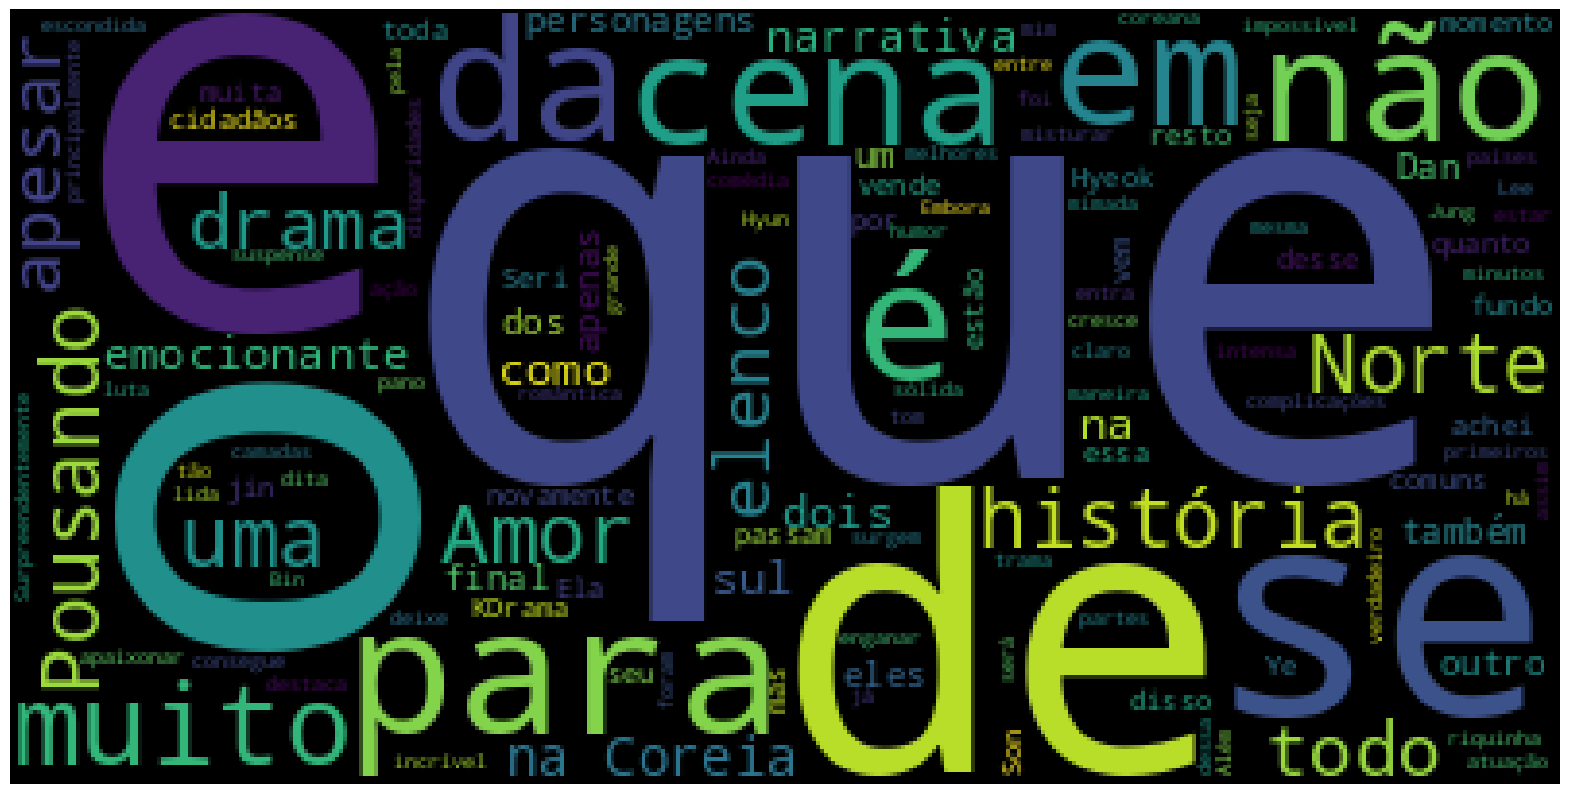

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(WordCloud().generate(filme))